##ASL Model 

input: video path 
output: predicted sign (0-9 or a-z, or space,delete)


In [ ]:
import numpy as np
import cv2
import os
import keras
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
working_dir = '/content/drive/My Drive/Computer Vision Project'

In [ ]:
cd '$working_dir'

/content/drive/My Drive/Computer Vision Project


# Extracting frames and hand images

In [ ]:
#video_dir = '/content/drive/My Drive/Computer Vision Project/Video/start_kit/videos/19512.mp4'
video_dir = '/content/drive/My Drive/Computer Vision Project/Video/start_kit/videos/0000.mp4'
image_dir = '/content/drive/My Drive/Computer Vision Project/Images'

# Extracting images from Video Feeds
Reference Video https://www.youtube.com/watch?v=yKZ_A0XzXMU

**Features:**

*   imgNameGen() - create a name for the image that is created. 
    *    **@parameter** frame_number - which frame we are creating a name for. [**Required**]
    *    **@parameter** debug - used for testing this function and is disabled by default. This parameter will change the name from "frameX" to "debug_frameX" [*Optional*]
    *    **@return** returns a generated name for the video frame. "frameX" for non-debug frame, and "debug_frame" for a debug frame. X repersents the frame number.

*   videoLenght() - finds the length of the specified video from the given path (include filename and extention with the path). 
    *    **@parameter** video_path - the path of where to locate this video file (include filename and extention with the path) [**Required**]
    *    **@return** returns the length of the video file.

*   extractVideoFrames() - extracts a image from a video file and save them as .jpg files.
    *    **@parameter** video_path - the path of where to locate this video file (include filename and extention with the path) [**Required**]
    *    **@parameter** save_path - the path of where to save this video frame. [**Required**]
    *    **@parameter** start - where to start extracting frames from the video. (default 0) [*Optional*]
    *    **@parameter** stop - where to stop extracting frames from the video. 
  (default 0) [*Optional*]
         *    Note: if both start and stop parameters are 0 this function will extract all frames in the video
    *    **@parameter** frame_step - the step size of the extraction function. If frame_step is greater that it's default, n-1 frames will be skiped, where n is the value given to frame_step. (default 1) [*Optional*]
    *    **@parameter** debug - used for testing this function and is disabled by default. This will cause the function to return 1 frame. [*Optional*]
    *    **@return** returns -1 If the extraction proccess fails, an error message is generated to explain the error.

*   extractVideoFramesToArray() - extracts a image from a video file and saves the images as an array.
    *    **@parameter** video_path - the path of where to locate this video file (include filename and extention with the path) [**Required**]
    *    **@parameter** start - where to start extracting frames from the video. (default 0) [*Optional*]
    *    **@parameter** stop - where to stop extracting frames from the video. 
  (default 5) [*Optional*]
         *    Note: if both start and stop parameters are 0 this function will extract all frames in the video, depending on your system RAM the created array will be in the size of a uncompressed video.
    *    **@parameter** frame_step - the step size of the extraction function. If frame_step is greater that it's default, n-1 frames will be skiped, where n is the value given to frame_step. (default 1) [*Optional*]
    *    **@parameter** debug - used for testing this function and is disabled by default. This will cause the function to return 1 frame. [*Optional*]
    *    **@return** returns -1 If the extraction proccess fails, an error message is generated to explain the error. otherwise it will return an array of images



In [ ]:
'''
    Needed libraries
'''
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


'''
  create names for the created images 
  frame_number - what is the number of the frame
  debug - used for extractVideoFrames() debug mode (False for no debuging, True for debuging) (default = False)
  returns "frameXXX" X representing a frame number
'''
def imgNameGen(frame_number, debug = False):
  if debug:
    file_name = "debug_frame" + str(frame_number)
    return file_name
  else:
    file_name = "frame" + str(frame_number)
    return file_name

'''
  Gets the total length of the video using cv2
  returns the video length as a int
'''
def videoLength(video_path):
  capture = cv2.VideoCapture(video_path)
  length = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
  capture.release()
  return length

'''
  Extracts Video frames and saves the created image in the specified save path
     start - where to start capturing frames (default = 0)
     stop - where to stop capturing frames (default = 0)
     frame_step - how many frames are stepped over per run 
     frame_step can also be equal to frames per second to get 1 frame every second to reduce
     data production size (frame_step - 1 = frames_skipped) (default = 1)
     save_path - where to save the created images
     video_path - where to locate the video
     debug - this is for testing only (False for no debuging, True for debuging) (default = False)
     returns -1 if proccess failed
'''
def extractVideoFrames(video_path, save_path, start=0, stop=0, frame_step = 1, debug = False):
  length = videoLength(video_path)
  # if no value is for start and stop specified then extract all frames from video
  # else use values given

  if start == 0 and stop == 0:
    stop = length
  elif start > stop:
    # if we catch that the start value is greater than stop set start == stop
    stop = start
    # to be safe check if these values are out of bounds
    if (start < 0 or stop < 0) or (start > length or stop > length):
       # if we catch that start and stop are out of bounds use default behavior
       start = 0
       stop = length
  elif (start < 0 or stop < 0) or (start > length or stop > length):
    # if we catch that start and stop are out of bounds use default behavior
    start = 0
    stop = length
    # check if frame_step is valid
  elif frame_step > length:
    print("Error, frame_step exceeds video length!")
    return -1
  elif frame_step <= 0:
    print("Fatal Error, cannot step over 0 or negative steps!")
    return -1
  #check to make sure that video is a video (video's should have more than 0 frames else send error)
  if length == 0:
    print("Error, specified video has insufficent frames to continue!")
    return -1
  
  #get video capture
  capture = cv2.VideoCapture(video_path)

  #get the file name without extenstion

  ignore_path, file_name = os.path.split(video_path)
  name_of_video = os.path.splitext(file_name)[0]
  '''
    Test Code comment out after testing
  '''

  # test to see if we can get frames
  # isAFrame - boolean that states that we successful got a frame
  # Frame - the frame from the video we got
  if debug:
    isAFrame, Frame = capture.read()
    if isAFrame:
      print("Successfuly read a frame from video")
      frame_count = 1
      test_path = os.path.join(save_path, name_of_video + '_{}.jpg'.format(imgNameGen(frame_count, debug)))
      cv2.imwrite(test_path,Frame)
      # test to see if we successfuly created a file
      if os.path.isfile(test_path):
        print("File creation successfull")
      else:
        print("File creation failed")
        return -1
    else:
      print("Error, did not get a frame from video")
      return -1
  else:
  # lets create images from the video
    isFrame = True
    frame_count = 0
    while isFrame:
      isFrame, Frame = capture.read()
      if isFrame and (frame_count >= start and frame_count <= stop) and frame_count % frame_step == 0:
        cv2.imwrite(os.path.join(save_path, name_of_video + '_{}.jpg'.format(imgNameGen(frame_count))),Frame)
        frame_count += 1
      else:
        frame_count +=1
  capture.release()
  return 0

  '''
  Extracts Video frames and puts created image in a array
     start - where to start capturing frames (default = 0)
     stop - where to stop capturing frames (default = 0)
     frame_step - how many frames are stepped over per run 
     frame_step can also be equal to frames per second to get 1 frame every second to reduce
     data production size (frame_step - 1 = frames_skipped) (default = 1)
     video_path - where to locate the video
     debug - this is for testing only (False for no debuging, True for debuging) (default = False)
     returns -1 if proccess failed, returns an array of images
'''
def extractVideoFramesToArray(video_path, start=0, stop=5, frame_step = 1, debug = False):
  length = videoLength(video_path)
  # if no value is for start and stop specified then extract all frames from video
  # else use values given

  if start == 0 and stop == 0:
    stop = length
  elif start > stop:
    # if we catch that the start value is greater than stop set start == stop
    stop = start
    # to be safe check if these values are out of bounds
    if (start < 0 or stop < 0) or (start > length or stop > length):
       # if we catch that start and stop are out of bounds use default behavior
       start = 0
       stop = length
  elif (start < 0 or stop < 0) or (start > length or stop > length):
    # if we catch that start and stop are out of bounds use default behavior
    start = 0
    stop = length
    # check if frame_step is valid
  elif frame_step > length:
    print("Error, frame_step exceeds video length!")
    return -1
  elif frame_step <= 0:
    print("Fatal Error, cannot step over 0 or negative steps!")
    return -1
  #check to make sure that video is a video (video's should have more than 0 frames else send error)
  if length == 0:
    print("Error, specified video has insufficent frames to continue!")
    return -1
  
  #get video capture
  capture = cv2.VideoCapture(video_path)

  #get the file name without extenstion

  ignore_path, file_name = os.path.split(video_path)
  name_of_video = os.path.splitext(file_name)[0]
  '''
    Test Code comment out after testing
  '''

  # test to see if we can get frames
  # isAFrame - boolean that states that we successful got a frame
  # Frame - the frame from the video we got
  if debug:
    isAFrame, Frame = capture.read()
    test_array = []
    if isAFrame:
      print("Successfuly read a frame from video")
      frame_count = 1
      test_array.append(Frame)
      # test to see if we successfuly created a file
      return test_array
    else:
      print("Error, did not get a frame from video")
      return -1
  else:
  # lets create images from the video
    isFrame = True
    frame_count = 0
    image_array = []
    while isFrame:
      isFrame, Frame = capture.read()
      if isFrame and (frame_count >= start and frame_count <= stop) and frame_count % frame_step == 0:
        Frame = cv2.cvtColor(Frame, cv2.COLOR_BGR2RGB)
        image_array.append(Frame)
        frame_count += 1
      else:
        frame_count +=1
  capture.release()
  return image_array



# Testing Code

In [ ]:

#extractVideoFrames(video_dir, image_dir, start=32, stop=34, frame_step = 1, debug = False)

images = extractVideoFramesToArray(video_dir, start=26, stop=1350, frame_step = 26, debug = False)
if type(images) != list:
   print("method failed")
else:
  print(images[0].shape)


(720, 1280, 3)


# Get the hand images 

In [ ]:
import cv2 as cv
%pylab inline
import sys
from google.colab.patches import cv2_imshow
hands =[]
for i in range(1,27):
  img = images[i];
  crop_img=img[250:700,200:600];
  resized_img =cv.resize(crop_img ,(64,64)) 
  hands.append(resized_img)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
len(hands)

26

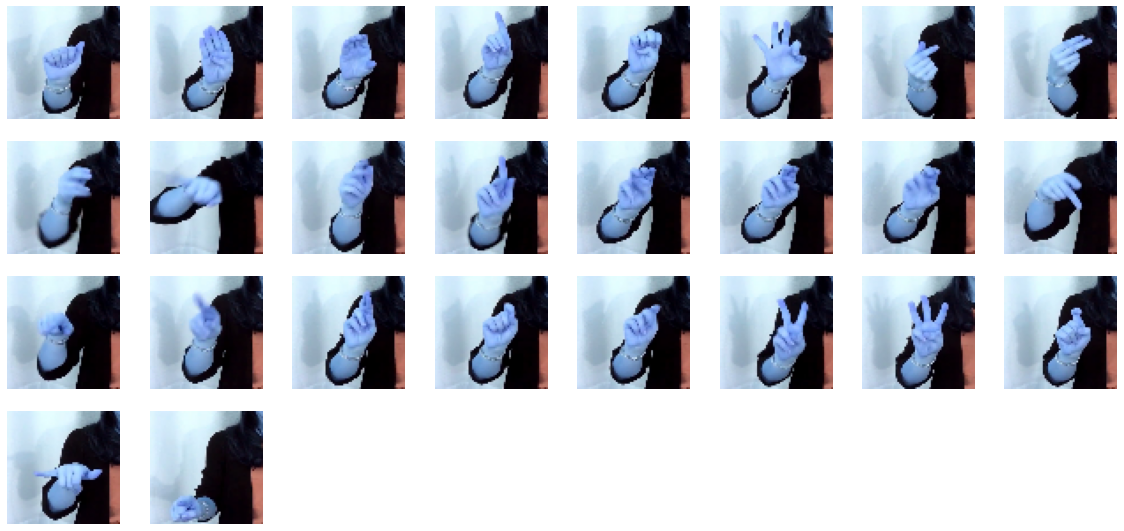

In [ ]:

fig = figure(0, (20, 12))
k=0
for i in range(0,26):
    
    fig.add_subplot(5, 8, k+1)
    
    img =hands[i]
    k=k+1
    imshow(img)
    axis('off')

# Feeding the hand images to the ASL model



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import cv2
import os
import keras

In [ ]:
# load json and create model
json_file = open('aslmodel2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("aslmodel2.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
#Compile the loaded model
loaded_model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Define the target classes accroding to the same order in the model:
categories =['0','1','2','3','4','5','6','7','8','9','a','b','c','d','del','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','space','t','u','v','w','x','y','z'];

In [ ]:
#Storing and normalizing

for i in range(len(hands)):
  hands[i] = hands[i]/255.

Populating the interactive namespace from numpy and matplotlib


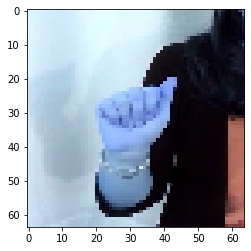

In [ ]:
%pylab inline
imshow(hands[0])

In [ ]:
#prdeict the given hand sign 
probabilities=[];
for i in range(len(hands)):
  y_test_pred = loaded_model.predict(np.array([hands[i]]), batch_size = 64, verbose = 0)
  probabilities.append(y_test_pred);
  

In [ ]:
#Map the propaplites to the corresponding sign.
predicted_sign=[]
for i in range(len(hands)):
  predicted_=categories[np.argmax(probabilities[i])]
  predicted_sign.append(predicted_)

In [ ]:
predicted_sign

['n',
 'n',
 'q',
 'p',
 'q',
 'e',
 'n',
 'x',
 'n',
 'q',
 'n',
 'n',
 'q',
 'n',
 'q',
 'n',
 'n',
 'm',
 'r',
 'q',
 'q',
 'k',
 'e',
 'r',
 'n',
 'r']